<h3>Load the data</h3>

In [108]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

# read data in
filen = 'complexity8Matrice'
# filen = 'complexity24Matrice'
data = pd.read_csv(filen + '.csv', header=None)

# show the data
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,28.213,29.100,28.157,28.291,28.803,27.524,29.351,28.235,29.648,29.001,...,25.613,27.440,27.160,29.290,27.884,26.097,26.458,27.461,28.198,28.134
1,27.756,30.432,26.052,26.529,25.578,28.113,28.714,27.379,28.835,27.758,...,26.798,27.508,25.993,26.248,25.744,26.495,26.099,26.097,27.480,26.490
2,29.391,29.761,29.463,29.472,29.201,31.470,29.138,31.036,30.540,30.622,...,29.469,31.379,30.402,29.592,29.866,29.759,30.121,29.732,29.096,30.353
3,29.533,29.584,30.081,29.545,30.253,29.896,29.302,30.481,30.478,30.476,...,29.927,29.615,29.852,31.610,31.529,29.698,29.570,33.139,31.832,29.781
4,27.129,28.038,28.363,28.111,27.531,30.353,31.209,29.031,28.850,28.235,...,30.198,29.635,29.156,28.877,28.070,28.522,29.500,27.998,28.963,29.171


In [93]:
# compute col-wise means to get mean sig complexity per person (over their 25 sigs)
data_mean = np.mean(data, axis=1)
data_mean.head()

0    20.12460
1    22.15000
2    27.59440
3    26.52496
4    23.65088
dtype: float64

<h3>Clustering - K-means</h3>

In [94]:
# Cluster people with K-means
from sklearn import cluster

n_clusters = 3
np.random.seed(0)

X = data_mean.values
X = X.astype(np.float)
X = X.reshape(-1, 1)

# run k-means 10 times to get best initialisation
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=10)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
print(values)
labels = k_means.labels_
print(labels)

[ 27.85264281  10.859084    23.45649889]
[2 2 0 0 2 0 0 2 0 2 0 0 0 0 2 1 1 2 2 0 2 1 1 2 0 0 2 2 1 0 2 2 0 0 2 2 1
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 2 0 0 2 2 2 0 0 0 2 0 2 0 0 2 2 0 0 2 2
 0 0 2 0 0 2 0 0 1 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 2]


<h3>Visualise the signatures for each cluster</h3>

In [95]:
def getfilename(pnum, snum):
    return str(pnum) + 'v' + str(snum)

# function to visualise one signature
# formate: 0v0.txt
def vis(pnum, snum, show=False, save=False, showpenups=False):
    # load the text file
    inputfile = pd.read_csv('./TEXT/' + getfilename(pnum,snum) + '.txt', sep=' ', header=None)
    
    # extract first two cols as X and Y
    if(showpenups):
        X = inputfile.iloc[:,0]
        Y = inputfile.iloc[:,1]
    else:
        NP = inputfile[inputfile.iloc[:,2] > 0]
        X = NP.iloc[:,0]
        Y = NP.iloc[:,1]     

    # plot coords on scatterplot to visualise image
    plt.plot(X, Y, 'b-', linewidth=1)
    plt.tick_params(
        # axis='x',  # changes apply to the x-axis
        axis='both',  # changes apply to both axis
        which='both',  # both major and minor ticks are affected
        left='off',  # ticks along the left edge are off
        right='off',  # ticks along the right edge are off
        bottom='off',  # ticks along the bottom edge are off
        top='off',  # ticks along the top edge are off
        labelleft='off', #  labels along the left edge are off
        labelright='off',  # labels along the right edge are off
        labeltop='off',  # labels along the top edge are off
        labelbottom='off')  # labels along the bottom edge are off
    plt.tight_layout()
    if(show):
        plt.show()
        if(save):
            plt.savefig('./IMAGES/' + getfilename(pnum,snum) + '.png')

In [96]:
# # TEST
# # loop to generate images for all signatures (run once)
# for i in range(5):
#     for j in range(3):
#         vis(i,j, show=True, save=True)

In [97]:
# function to select all images for one person, arrange in a subplot and save/show as single image
def visp(pnum, save=False):
    for i in range(25):
        plt.subplot(5,5,i+1)
        vis(pnum, i)    
    if(save):
        plt.savefig('./IMAGES/' + str(pnum) + '_all.png')
    else:
        plt.show()

In [98]:
# TEST
# visp(1)

47
10


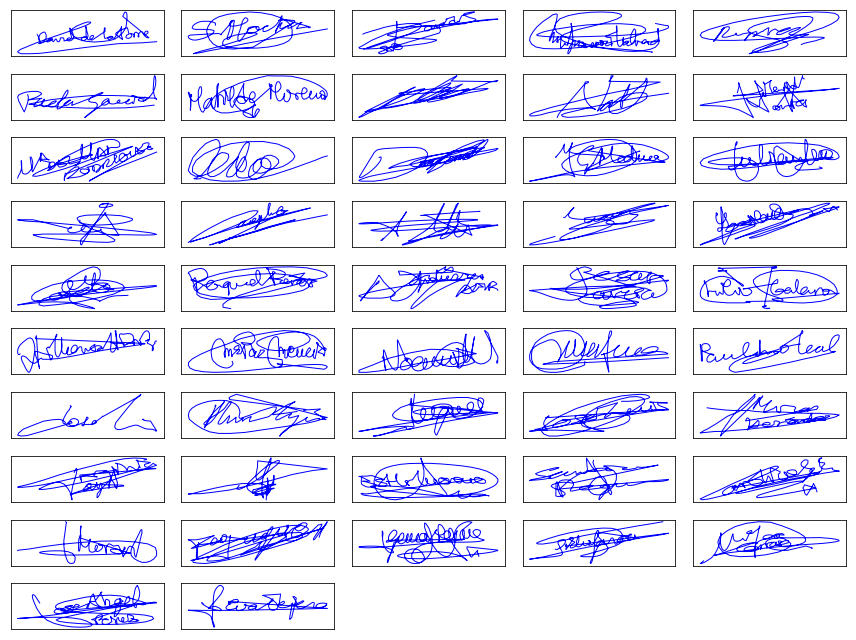

43
9


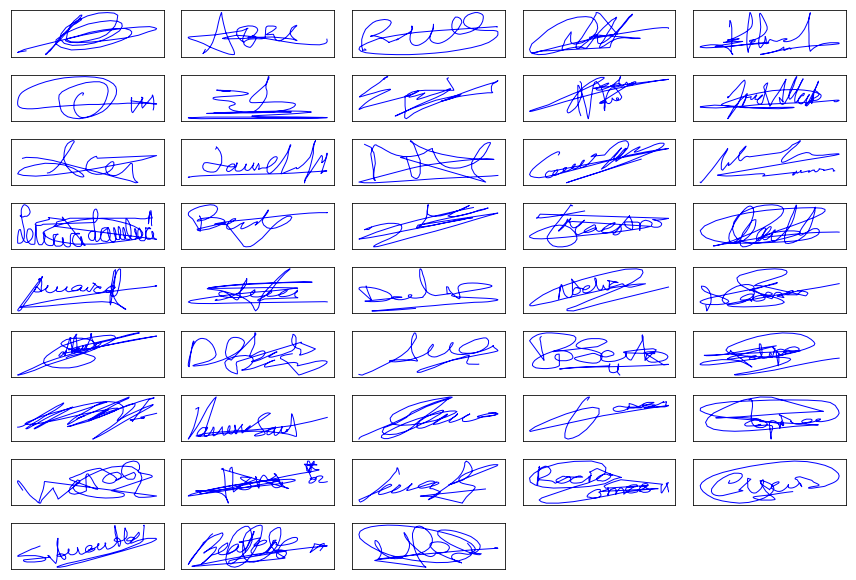

10
3


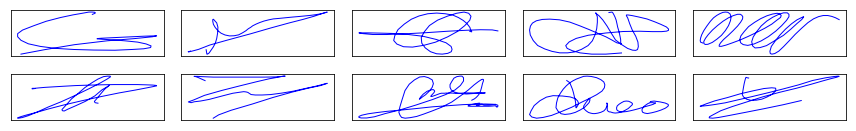

In [23]:
# loop to select 1st image for each person in a cluster, arrange in a subplot and save as single image

# for each cluster
for i in range(n_clusters):
    # find number of i's in labels
    count = list(labels).count(i)
    print(count)
    print(np.floor_divide(count, 5) + 1)
    plt.figure(figsize=(12, 9))
    k=1
    
    # enumerate through labels and test value against current cluster i
    for j, lab in enumerate(labels):
        # if the label is the current cluster in the main loop, visualise the first sig of the person j
        if(lab==i):
            # just choose 10*10, assuming no cluster will be bigger than this
            plt.subplot(10, 5, k)
            vis(j, 1)
            k = k + 1

    plt.savefig('./IMAGES/' + str(filen) + '_clust_' + str(i) + '.png')
    plt.show()

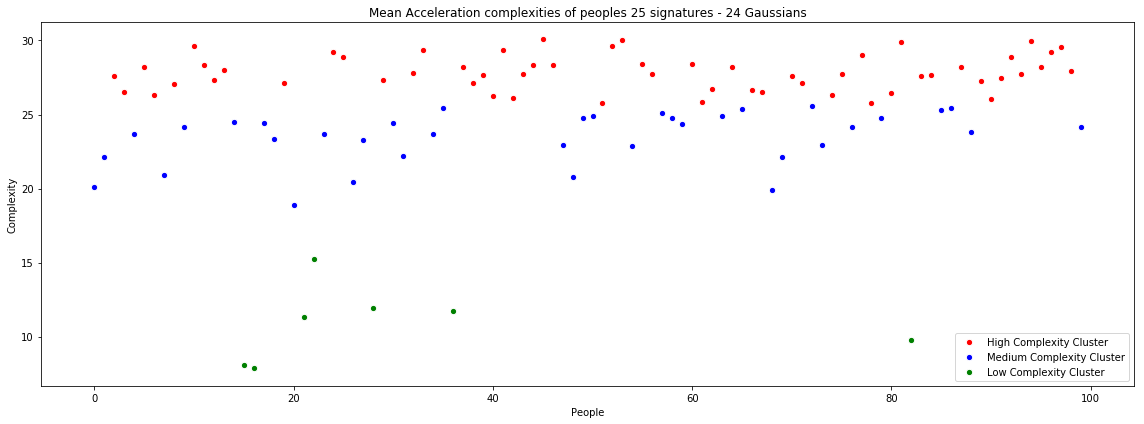

In [101]:
# plot complexity of users, colour by cluster

# put means and clusters into one df
data_plot = pd.DataFrame()
data_plot['index'] = data_mean.index
data_plot['mean'] = data_mean
data_plot['cluster'] = labels
# data_plot.head()

data_plot_c1 = data_plot.loc[data_plot['cluster'] == 0]
data_plot_c2 = data_plot[data_plot['cluster'] == 1]
data_plot_c3 = data_plot[data_plot['cluster'] == 2]
# data_plot_c4 = data_plot[data_plot['cluster'] == 3]

# plot means, colour by cluster
# plot test on its own
fig = plt.figure(figsize=(16, 6))
plt.title('Mean Acceleration complexities of peoples 25 signatures - 24 Gaussians')
plt.xlabel('People')
plt.ylabel('Complexity')

# plt.scatter(data_plot_c3['index'], data_plot_c3['mean'], color='orange', label='V.High Complexity Cluster', edgecolors='w', s=40)
plt.scatter(data_plot_c1['index'], data_plot_c1['mean'], color='r', label='High Complexity Cluster', edgecolors='w', s=40)
plt.scatter(data_plot_c3['index'], data_plot_c3['mean'], color='b', label='Medium Complexity Cluster', edgecolors='w', s=40)
plt.scatter(data_plot_c2['index'], data_plot_c2['mean'], color='g', label='Low Complexity Cluster', edgecolors='w', s=40)

# plt.axhline(y=data_plot_c2['mean'].max(), linewidth=1, linestyle='dashed', color='g')
# plt.axhline(y=data_plot_c4['mean'].max(), linewidth=1, linestyle='dashed', color='b')
# plt.axhline(y=data_plot_c3['mean'].max(), linewidth=1, linestyle='dashed', color='orange')

plt.legend(loc=4)
plt.tight_layout()
plt.show()
fig.savefig('./IMAGES/complexities_people_Ac_24g_25sig.png')

In [265]:
print(data_plot_c1.shape)
print(data_plot_c3.shape)
print(data_plot_c4.shape)
print(data_plot_c2.shape)

(36, 3)
(46, 3)
(11, 3)
(7, 3)


In [109]:
# Cluster signatures with K-means

n_clusters = 3
np.random.seed(0)

X = data.values
X = X.astype(np.float)
X = X.reshape(-1, 1)

# run k-means 10 times to get best initialisation
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=10)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
print(values)
labels = k_means.labels_
print(labels)
print(X.shape)

[ 30.17213827  27.80254438  21.68105525]
[1 0 1 ..., 1 1 1]
(2500, 1)


In [110]:
# silhouette score
from sklearn.metrics import silhouette_score

sil = silhouette_score(X, labels)
print(sil)

0.564450218132


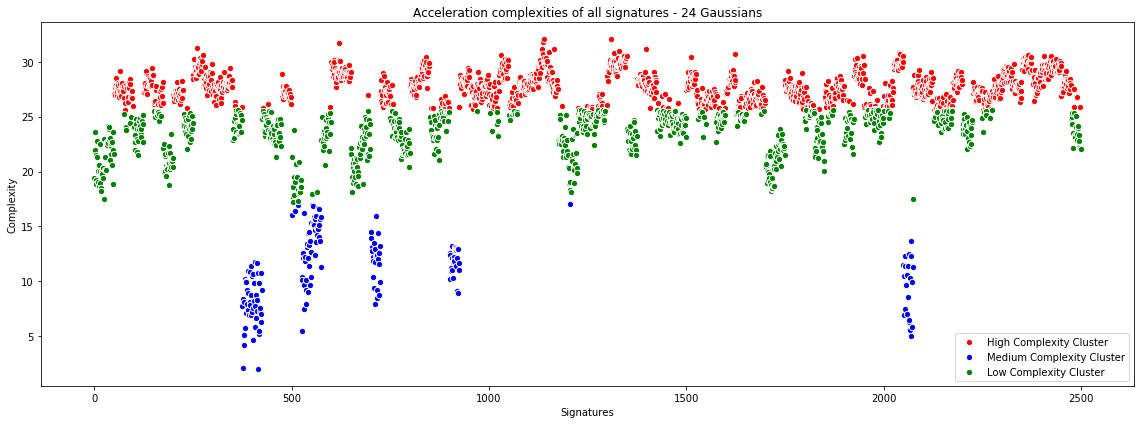

In [89]:
# plot complexity of signatures, colour by cluster

# put val and clusters into one df
data_plot = pd.DataFrame()
data_plot['index'] = range(2500)
data_plot['val'] = X
data_plot['cluster'] = labels
data_plot.head()

data_plot_c1 = data_plot.loc[data_plot['cluster'] == 0]
data_plot_c2 = data_plot[data_plot['cluster'] == 1]
data_plot_c3 = data_plot[data_plot['cluster'] == 2]
# data_plot_c4 = data_plot[data_plot['cluster'] == 3]

fig = plt.figure(figsize=(16, 6))
plt.title('Acceleration complexities of all signatures - 24 Gaussians')
plt.xlabel('Signatures')
plt.ylabel('Complexity')

# plt.scatter(data_plot_c4['index'], data_plot_c4['val'], color='orange', label='V.High Complexity Cluster', edgecolors='w', s=40)
plt.scatter(data_plot_c1['index'], data_plot_c1['val'], color='r', label='High Complexity Cluster', edgecolors='w', s=40)
plt.scatter(data_plot_c3['index'], data_plot_c3['val'], color='b', label='Medium Complexity Cluster', edgecolors='w', s=40)
plt.scatter(data_plot_c2['index'], data_plot_c2['val'], color='g', label='Low Complexity Cluster', edgecolors='w', s=40)

# plt.axhline(y=data_plot_c2['val'].max(), linewidth=1, linestyle='dashed', color='g')
# plt.axhline(y=data_plot_c3['val'].max(), linewidth=1, linestyle='dashed', color='b')
# plt.axhline(y=data_plot_c4['val'].max(), linewidth=1, linestyle='dashed', color='orange')

plt.legend(loc=4)
plt.tight_layout()
plt.show()
fig.savefig('./IMAGES/complexities_signatures_Ac_24g_25sig.png')

In [90]:
# print(data_plot_c3['val'].max())
print(data_plot_c1.shape)
print(data_plot_c3.shape)
# print(data_plot_c4.shape)
print(data_plot_c2.shape)

(1440, 3)
(176, 3)
(884, 3)


In [91]:
print(data_plot_c1['val'].min())
print(data_plot_c1['val'].max())
print(data_plot_c2['val'].min())
print(data_plot_c2['val'].max())
print(data_plot_c3['val'].min())
print(data_plot_c3['val'].max())

25.615
32.071
17.253
25.612
2.0602
17.041


(15, 1)
(15, 7)
(15, 5)
(15, 4)
(15, 12)
(15, 18)
(16, 16)
(15, 2)
(15, 17)
(15, 0)


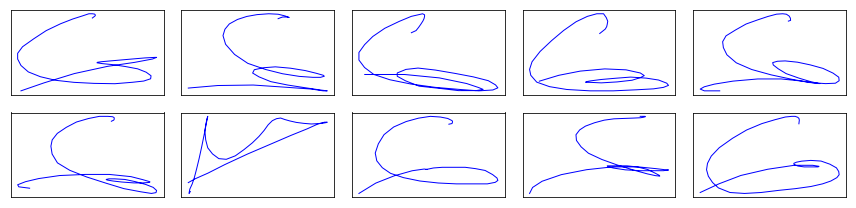

In [296]:
data_plot_sort = data_plot.drop(columns=['cluster'])
# tenlargest = data_plot_sort.nlargest(10, 'val')
tenlargest = data_plot_sort.nsmallest(10, 'val')
snum = tenlargest['index'] % 25
pnum = np.floor_divide(tenlargest['index'], 25)

tenlargestlist = zip(pnum, snum)

plt.figure(figsize=(12, 3))
k=1

for i in tenlargestlist:
    print(i)
    plt.subplot(2, 5, k)
    vis(i[0], i[1], save=False, showpenups=True)
    k = k + 1

# plt.savefig('./IMAGES/tenlargestlist_nopenups.png')
plt.savefig('./IMAGES/tensmallestlist_penups.png')
plt.show()

In [354]:
# Cluster signatures with CAH
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

np.random.seed(0)

X = data.values
X = X.astype(np.float)
X = X.reshape(-1, 1)

# generate the linkage matrix
Z = linkage(X, 'ward')

# test quality of clustering
c, coph_dists = cophenet(Z, pdist(X, metric='euclidean'))
print(c)

# print cluster assignment
k=3
clusters = fcluster(Z, k, criterion='maxclust')
print(clusters)

0.869919467879
[2 2 2 ..., 3 2 2]


In [356]:
sil = silhouette_score(X, clusters)
print(sil)

0.588881805374


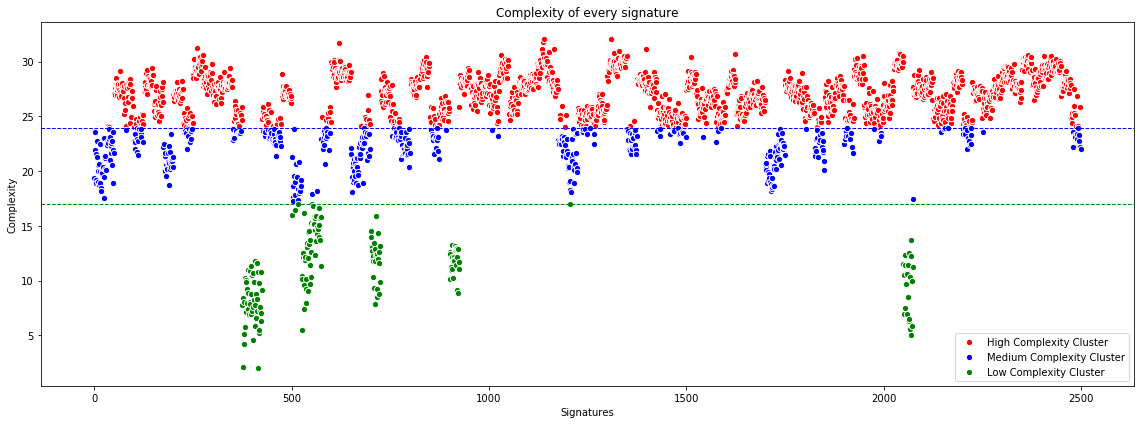

In [105]:
# plot complexity of signatures, colour by cluster

# put val and clusters into one df
data_plot = pd.DataFrame()
data_plot['index'] = range(2500)
data_plot['val'] = X
data_plot['cluster'] = clusters
data_plot.head()

data_plot_c1 = data_plot.loc[data_plot['cluster'] == 1]
data_plot_c2 = data_plot[data_plot['cluster'] == 2]
data_plot_c3 = data_plot[data_plot['cluster'] == 3]

# plot val, colour by cluster
# plot test on its own
fig = plt.figure(figsize=(16, 6))
plt.title('Complexity of every signature')
plt.xlabel('Signatures')
plt.ylabel('Complexity')

plt.scatter(data_plot_c3['index'], data_plot_c3['val'], color='r', label='High Complexity Cluster', edgecolors='w', s=40)
plt.scatter(data_plot_c2['index'], data_plot_c2['val'], color='b', label='Medium Complexity Cluster', edgecolors='w', s=40)
plt.scatter(data_plot_c1['index'], data_plot_c1['val'], color='g', label='Low Complexity Cluster', edgecolors='w', s=40)

plt.axhline(y=data_plot_c2['val'].max(), linewidth=1, linestyle='dashed', color='b')
plt.axhline(y=data_plot_c1['val'].max(), linewidth=1, linestyle='dashed', color='g')

plt.legend(loc=4)
plt.tight_layout()
plt.show()
fig.savefig('./IMAGES/complexities_signatures_CAH.png')

In [97]:
print(data_plot_c2['val'].max())
print(data_plot_c1.shape)
print(data_plot_c2.shape)
print(data_plot_c3.shape)

23.975
(176, 3)
(477, 3)
(1847, 3)


<h3> GMM Clustering</h3>

In [372]:
# gmm clustering
from sklearn import mixture

np.random.seed(0)

X = data.values
X = X.astype(np.float)
X = X.reshape(-1, 1)

# Fit a Gaussian mixture with EM using 3 components
# gmm = mixture.GaussianMixture(n_components=3, covariance_type='full', max_iter=500).fit(X)
# labels = gmm.predict(X)

# Fit a Dirichlet process Gaussian mixture using 3 components
weight_concentration_prior = 1e+3
dpgmm = mixture.BayesianGaussianMixture(n_components=8, covariance_type='full', max_iter=1000, n_init=5,
                                        weight_concentration_prior=weight_concentration_prior).fit(X)
labels_dp = dpgmm.predict(X)
print('done')

done


In [373]:
print(labels_dp[1::5])
print(np.unique(labels_dp))

[3 2 2 2 2 2 2 3 2 3 0 0 0 0 0 3 3 3 0 0 3 3 2 3 3 0 0 0 0 0 3 0 3 0 0 2 2
 2 2 2 0 0 0 0 0 3 3 3 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 3 3
 3 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 2 3 2 3 3 0 0 0 0 0 2 2 2 2 2 1 1 1 1 1 2
 1 1 1 1 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 3 2 3 3 3 1 1 1 1 1 0 0 3
 0 0 3 3 3 3 3 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 3 3 3 3 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 3 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 0 3
 3 0 0 0 0 0 0 0 0 0 0 3 3 2 2 2 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 3 3 3 3
 3 3 3 3 0 0 0 0 0 3 3 0 3 0 0 3 0 0 0 3 3 3 3 3 0 0 0 0 0 3 3 3 3 3 3 3 3
 0 0 0 0 3 0 3 2 2 2 2 2 2 2 2 3 2 0 0 0 0 0 0 0 0 0 0 3 0 3 3 3 2 3 3 3 2
 0 0 0 0 3 0 0 0 0 0 3 3 3 3 3 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 0 3 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 0 3 3 3 3 0 0 0 0 0 3 3 3 2
 3 0 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [374]:
sil = silhouette_score(X, labels_dp)
print(sil)

0.577589766999


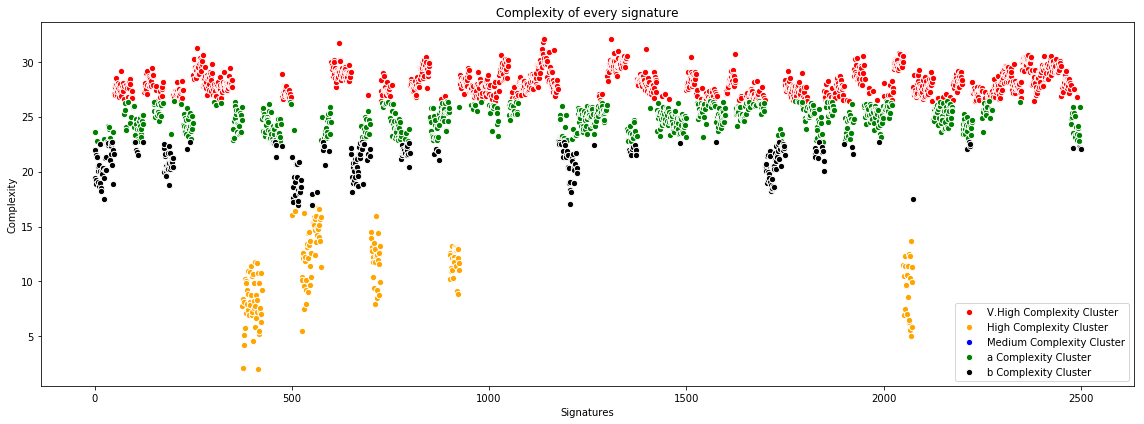

In [187]:
# plot complexity of signatures, colour by cluster

# put val and clusters into one df
data_plot = pd.DataFrame()
data_plot['index'] = range(500)
data_plot['val'] = X
data_plot['cluster'] = labels_dp
data_plot.head()

data_plot_c1 = data_plot.loc[data_plot['cluster'] == 0]
data_plot_c2 = data_plot[data_plot['cluster'] == 1]
data_plot_c3 = data_plot[data_plot['cluster'] == 2]
data_plot_c4 = data_plot[data_plot['cluster'] == 3]

# plot val, colour by cluster
# plot test on its own
fig = plt.figure(figsize=(16, 6))
plt.title('Complexity of every signature')
plt.xlabel('Signatures')
plt.ylabel('Complexity')

plt.scatter(data_plot_c1['index'], data_plot_c1['val'], color='r', label='V.High Complexity Cluster', edgecolors='w', s=40)
plt.scatter(data_plot_c4['index'], data_plot_c4['val'], color='orange', label='High Complexity Cluster', edgecolors='w', s=40)
plt.scatter(data_plot_c2['index'], data_plot_c2['val'], color='b', label='Medium Complexity Cluster', edgecolors='w', s=40)
plt.scatter(data_plot_c3['index'], data_plot_c3['val'], color='g', label='Low Complexity Cluster', edgecolors='w', s=40)

plt.axhline(y=data_plot_c4['val'].max(), linewidth=1, linestyle='dashed', color='orange')
plt.axhline(y=data_plot_c2['val'].max(), linewidth=1, linestyle='dashed', color='b')
plt.axhline(y=data_plot_c3['val'].max(), linewidth=1, linestyle='dashed', color='g')

plt.legend(loc=4)
plt.tight_layout()
plt.show()
fig.savefig('./IMAGES/complexities_signatures_GMM_k4.png')

In [145]:
print(data_plot_c2['val'].max())
print(data_plot_c3['val'].max())
print(data_plot_c1.shape)
print(data_plot_c4.shape)
print(data_plot_c2.shape)
print(data_plot_c3.shape)


22.862
16.852
(1285, 3)
(747, 3)
(295, 3)
(173, 3)


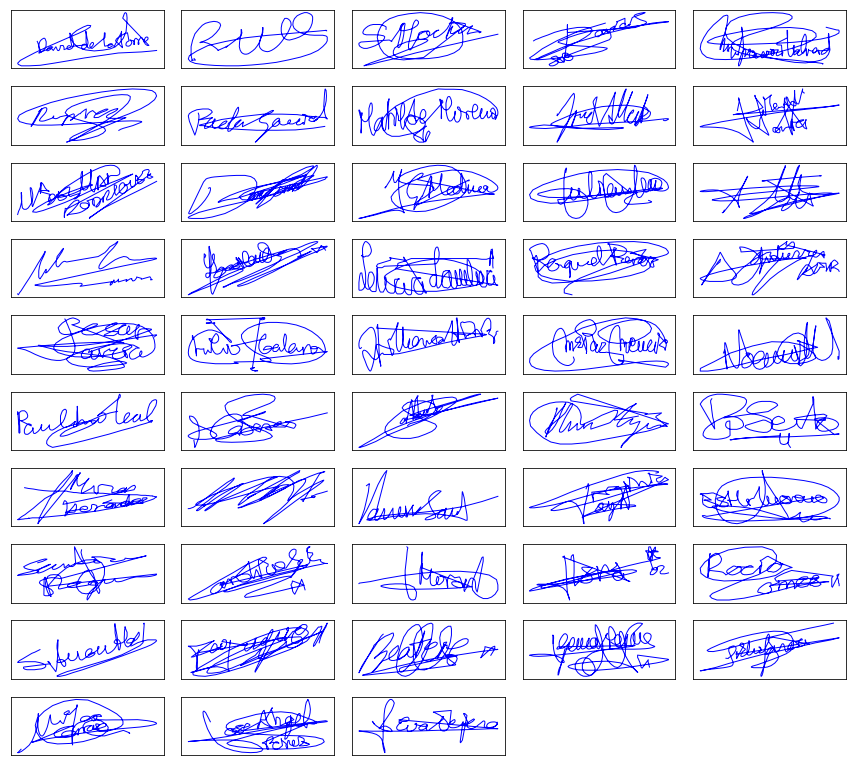

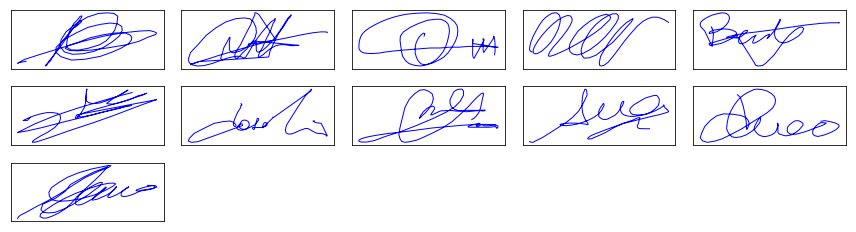

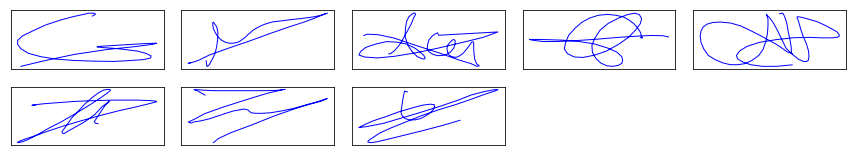

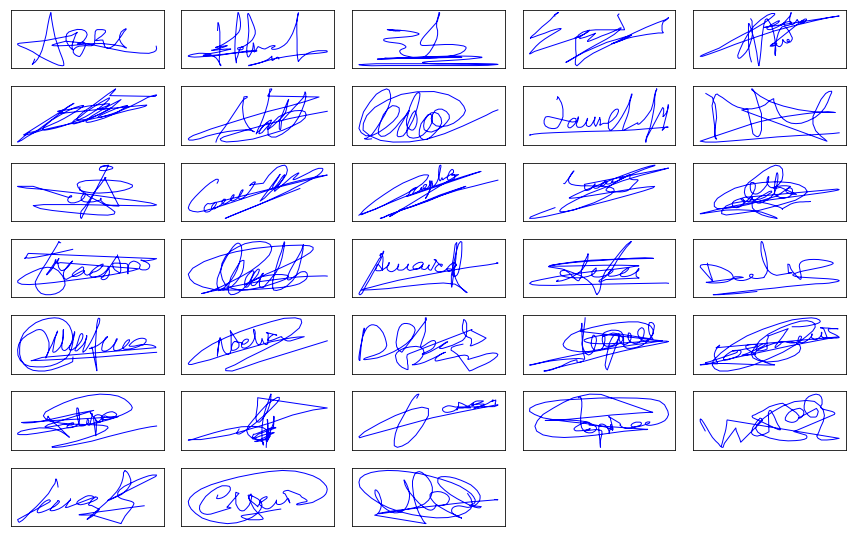

In [131]:
# loop to select 1st image for each person in a cluster, arrange in a subplot and save as single image
n_clusters = 4

def enumerate2(xs, start=0, step=1):
    for x in xs:
        yield (start, x)
        start += step
        
# for each cluster
for i in range(n_clusters):
#     # find number of i's in labels
#     count = list(labels_dp).count(i)
#     print(count)
#     print(np.floor_divide(count, 5) + 1)
    plt.figure(figsize=(12, 16))
    k=1
    
    # enumerate through 2500 x labels_dp and test value against current cluster i
#     for j, lab in enumerate2(labels_dp, 0, 25):
    for j in range(0, 2500, 25):
        # if the label is the current cluster in the main loop, visualise this person's first sig
        if(labels_dp[j]==i):
            # just choose 15*5, assuming no cluster will be bigger than this
            person_id = np.floor_divide(j, 25)
#             print(person_id)
            plt.subplot(15, 5, k)
            vis(person_id, 1)
            k = k + 1

    plt.savefig('./IMAGES/BGMM_K4_clust_' + str(i) + '.png')
    plt.show()